In [57]:
##################################################################
##
## I. définir le dossier de travail, import des librairies (packages)
##                  lecture et chargement des données
##
##################################################################

### Se positionner dans le répertoire des données ###
## vous changer le 'work directory' dans RStudio via le menu

setwd('../BData') ## A adapter en fonction de la localisation du dossier

### chargement des paquets R pour lire et manipuler les données spatiales 
library(sf) ## lecture et écriture de données vecteurs 
##library(rgdal) ## lecture de données vecteurs

In [58]:
##########################################################################
## Charge l'ensemble des pts echantillonnes sur la zone atelier de Fenay
## utilisation de la fonction st_read du package sf
## pour lister l'ensemble des fonctions du package sf: help(package = "sf")

## ?st_read ## pour afficher l'aide sur la function supprimer le commentaire ##

mydata <- st_read("ptsampleFenayL93.shp") ## Lecture et chargement des données


## mydata <- readOGR("ptsampleFenayL93.shp")
## affiche le header des données

Reading layer `ptsampleFenayL93' from data source 
  `/home/thierry/works/R4R2D2C/BData/ptsampleFenayL93.shp' using driver `ESRI Shapefile'
Simple feature collection with 269 features and 16 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: 853766.6 ymin: 6681507 xmax: 858712.6 ymax: 6684948
Projected CRS: RGF93 / Lambert-93


In [59]:
## type de l'objet mydata
class(mydata)
## structure de l'objet mydata
str(mydata)

[1] "sf"         "data.frame"

Classes ‘sf’ and 'data.frame':	269 obs. of  17 variables:
 $ field_1   : chr  "Py_1_2011" "Py_100_2011" "Py_101_2011" "Py_102_2011" ...
 $ annee     : num  2011 2011 2011 2011 2011 ...
 $ SOC       : num  35 24.5 23 19.8 45.2 10.3 33.2 11 10.4 37.6 ...
 $ TN        : num  3.07 2.42 2.43 2.1 3.75 5.92 3.14 1.06 0.999 3.25 ...
 $ C_N       : num  11.4 10.1 9.48 9.44 12 1.74 10.6 10.4 10.4 11.6 ...
 $ PH        : num  6.78 8.1 7.5 7.51 8.06 8.25 8.2 6.78 7.75 8.13 ...
 $ Clay      : num  44.2 34.3 42 40.3 33 31 21.4 27.3 24.3 23.2 ...
 $ Sand      : num  4.5 15 8 11.6 10.1 5.6 14.4 7.9 6.5 11.8 ...
 $ XLB93     : num  857059 854843 858498 858283 855273 ...
 $ YLB93     : num  6684437 6682797 6682798 6682798 6682798 ...
 $ cat_cultur: chr  "Foret" "Hiver" "Ete" "Ete" ...
 $ Categories: chr  "pas_de_travail" "Travail_intermediaire" "Labour" "Labour" ...
 $ Shannon   : num  4.81 5.73 5.47 5.49 5.74 ...
 $ Evenness  : num  0.697 0.796 0.782 0.778 0.79 ...
 $ X1.Simpson: num  25.7 94.5 86.9 75

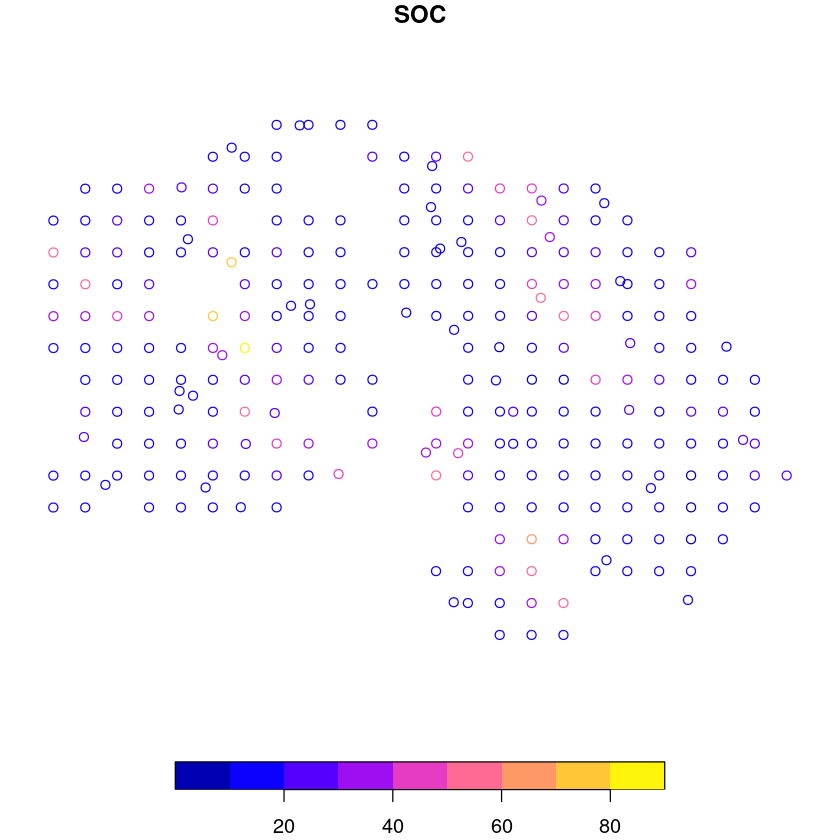

In [60]:
##################################################################
##
## II. Exploration des données :
##       - graphe les données pour la variable SOC (matière organique)
##       - trace l'histogramme pour la variable SOC
##       - Calcul des moments d'ordre 1 : min, max, moyenne, écart-type
##
##################################################################

## Graphe la variable SOC 
plot(mydata["SOC"])

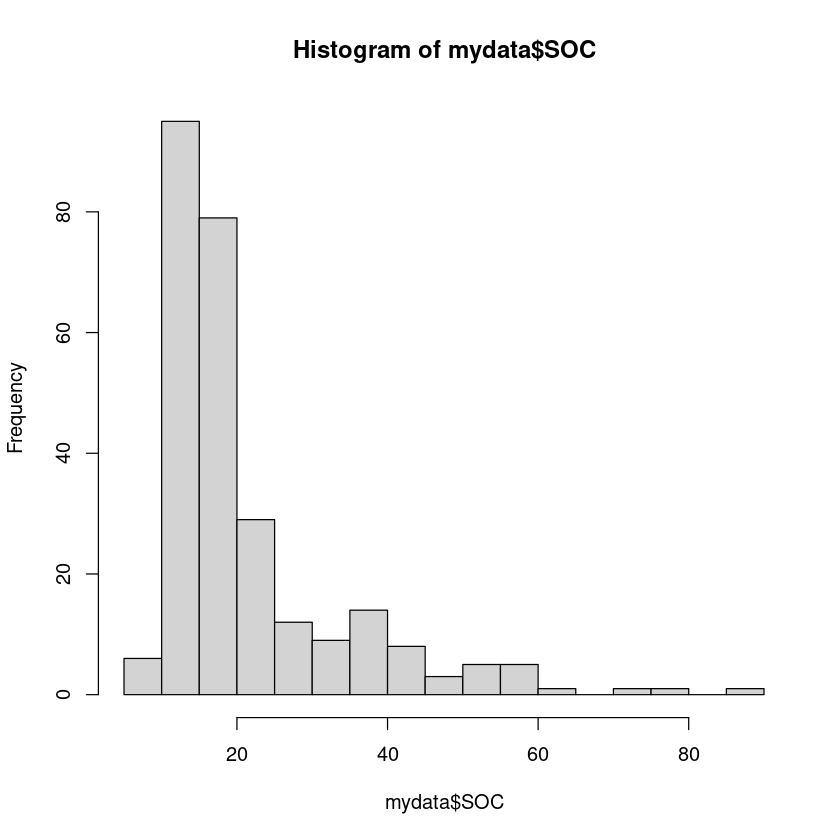

In [61]:
## gamme et distribution des valeurs pour la variable SOC
hist(mydata$SOC,breaks=15)

In [62]:
min(mydata$SOC);max(mydata$SOC)
range(mydata$SOC)
mean(mydata$SOC);sd(mydata$SOC)

[1] 9.5

[1] 88.6

[1]  9.5 88.6

[1] 21.38892

[1] 12.85612

[1] 0.7226226


Call:
lm(formula = SOC ~ Biomasse, data = mydata)

Residuals:
    Min      1Q  Median      3Q     Max 
-54.076  -4.497  -2.043   2.393  44.848 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.664388   0.829971   12.85   <2e-16 ***
Biomasse     0.165438   0.009685   17.08   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.903 on 267 degrees of freedom
Multiple R-squared:  0.5222,	Adjusted R-squared:  0.5204 
F-statistic: 291.8 on 1 and 267 DF,  p-value: < 2.2e-16


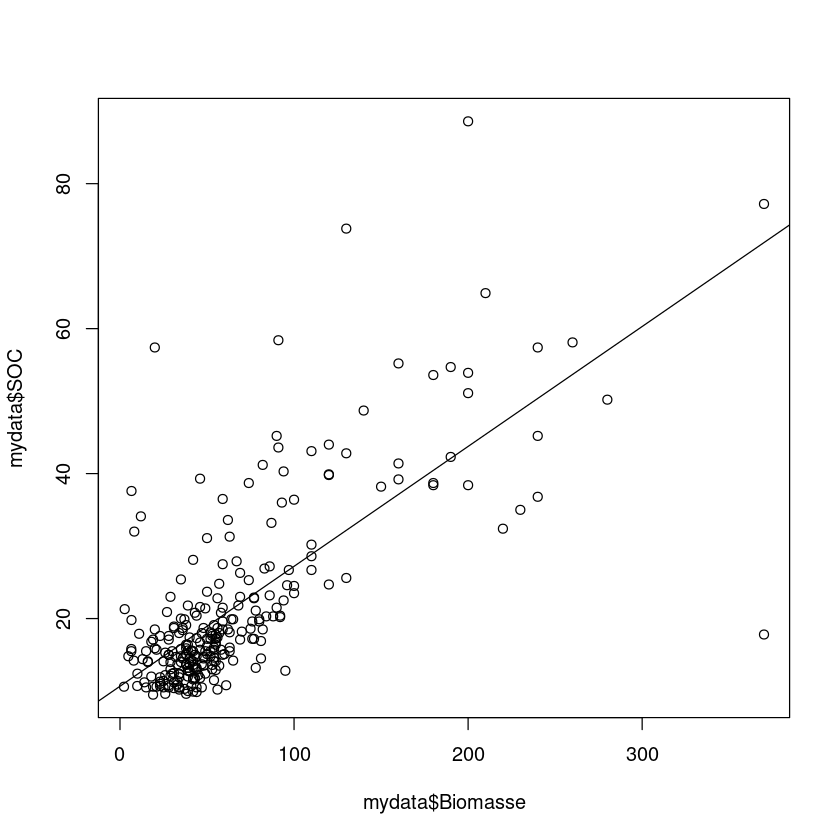

In [63]:
##################################################################
##
## III. Ajustement d'un modèle linéaire simple
##      métrique de la qualité de l'ajustement du modèle : r et R2
##      erreur quadratique moyenne associée à l'ajustement : RMSE
##
##################################################################

## scatterplot de SOC vs. Biomasse
plot(mydata$Biomasse,mydata$SOC)

## Ajustement d'un modèle linéaire
mylm <- lm(SOC~Biomasse, data = mydata)

## corrélation linéaire entre les deux variables
cor(mydata$Biomasse,mydata$SOC)

## résumé des paramètres et de la qualité de l'ajustement
summary(mylm)

## Trace la modèle linéaire ajusté
abline(mylm)

###############################################
## Que déduire de ces résultats ?
## Commentaires ?

In [64]:
## Calcule de la RMSE (Root Mean Squared Error) ou Erreur Quadratique Moyenne
RMSE <- sqrt(sum(mylm$residuals^2)/length(mylm$residuals))
RMSE

[1] 8.87017

In [65]:
##############################################################
##
## IV. Evaluation de la robustesse du modèle linéaire ajusté
##
## 1- estimateur cross validation : 1 échantillon d'entraînement (training sample) ~70%
##                                  1 échantillon de contrôle (control sample) ~30%
##
## 2- estimateur jackknife également appelée leave-one-out
###############################################################
dim(mydata) ## dimension de la table des données
ctrlsize <- floor(dim(mydata)[1]*0.3)
trainingsize <- dim(mydata)[1] - ctrlsize
ctrlsize ## nombre des données dans l'échantillon de contrôle
trainingsize ## nombre des données dans l'échanllion d'ajustement du modèle

## tirage aléatoire des données pour le contrôle
ctrl_sample <- sample(1:dim(mydata)[1], size=ctrlsize)

## copie de mydata et transformation en un objet dataframe
mydf <- mydata
st_geometry(mydf) <- NULL ## supression de la partie spatiale
class(mydf) ## mydf est maintenant un  objet dataframe cela va simplifier le sous-échantillonnage

[1] 269  17

[1] 80

[1] 189

[1] "data.frame"

In [66]:
#########################################################################################
##
## Calcul modèle d'entrainement
##
#########################################################################################
## Sélection des données pour paramétrer le modèle d'entrainement
training_mydf <- mydf[-ctrl_sample,]
## Sélection des données pour évaluer/controler le modèle
control_mydf <- mydf[ctrl_sample,]
## dimension de l'échantillon
dim(training_mydf)
dim(control_mydf)
## corrélation linéraire entre SOC vs Biomasse
cor(training_mydf$Biomasse,training_mydf$SOC)
## Ajustement du modèle linéraire à partie de l'échantillon d'entraînement
mydflm <- lm(SOC~Biomasse, data = training_mydf)

[1] 189  16

[1] 80 16

[1] 0.7284585

In [67]:
summary(mydflm)


Call:
lm(formula = SOC ~ Biomasse, data = training_mydf)

Residuals:
    Min      1Q  Median      3Q     Max 
-48.832  -4.382  -1.832   2.268  43.168 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11.13245    0.91666   12.14   <2e-16 ***
Biomasse     0.15000    0.01032   14.54   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.367 on 187 degrees of freedom
Multiple R-squared:  0.5307,	Adjusted R-squared:  0.5281 
F-statistic: 211.4 on 1 and 187 DF,  p-value: < 2.2e-16


In [68]:
coef(mydflm)

(Intercept)    Biomasse 
 11.1324481   0.1499978

In [69]:
## Application du modèle ajusté sur les données de controle
## SOCpredict = a x Biomasse + b 
control_mydf$SOCpredict <- coef(mydflm)[2]*control_mydf$Biomasse + coef(mydflm)[1]

In [70]:
head(control_mydf)
tail(control_mydf)

,field_1,annee,SOC,TN,C_N,PH,Clay,Sand,XLB93,YLB93,cat_cultur,Categories,Shannon,Evenness,X1.Simpson,Biomasse,SOCpredict
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
232,Py_64_2011,2011,10.2,1.000,10.20,6.90,29.8,7.4,858282.7,6682367,Hiver,Labour,5.548,0.776101,64.648,34,16.23237
6,Py_104_2011,2011,10.3,5.920,1.74,8.25,31.0,5.6,858068.2,6682798,Hiver,Travail_intermediaire,5.519,0.771110,73.336,37,16.68237
191,Py_284_2011,2011,25.6,1.840,13.90,5.17,23.5,7.6,853982.2,6683012,Foret,pas_de_travail,4.788,0.691480,21.834,130,30.63216
19,Py_117_2011,2011,11.2,1.080,10.30,6.31,30.6,8.1,854197.4,6683012,Brassicacees,Travail_intermediaire,5.656,0.796540,97.848,14,13.23242
69,Py_164_2011,2011,15.5,1.480,10.50,7.54,36.0,7.6,855488.6,6683443,Hiver,Labour,5.539,0.785992,78.993,42,17.43236
189,Py_281_2011,2011,10.5,0.924,11.40,5.96,12.5,7.4,856994.5,6683444,Foret,pas_de_travail,5.365,0.753554,48.157,47,18.18234


,field_1,annee,SOC,TN,C_N,PH,Clay,Sand,XLB93,YLB93,cat_cultur,Categories,Shannon,Evenness,X1.Simpson,Biomasse,SOCpredict
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
77,Py_172_2011,2011,26.7,2.48,10.80,7.80,46.3,5.0,857657.4,6683475,Autres,pas_de_travail,5.335,0.760389,45.190,110.0,27.63221
182,Py_273_2011,2011,51.1,4.22,12.10,7.84,34.5,5.3,856563.4,6684733,Foret,pas_de_travail,5.278,0.741859,53.599,200.0,41.13201
66,Py_161_2011,2011,88.6,8.33,10.60,8.03,16.5,10.0,855058.3,6683443,Foret,pas_de_travail,5.639,0.765180,45.540,200.0,41.13201
3,Py_101_2011,2011,23.0,2.43,9.48,7.50,42.0,8.0,858497.9,6682798,Ete,Labour,5.469,0.782461,86.932,69.0,21.48230
221,Py_53_2011,2011,16.7,1.71,9.77,8.28,32.8,11.9,857422.9,6682153,Printemps,Decompactage,5.657,0.792811,89.443,46.0,18.03235
4,Py_102_2011,2011,19.8,2.10,9.44,7.51,40.3,11.6,858283.0,6682798,Ete,Labour,5.492,0.777978,75.408,6.6,12.12243


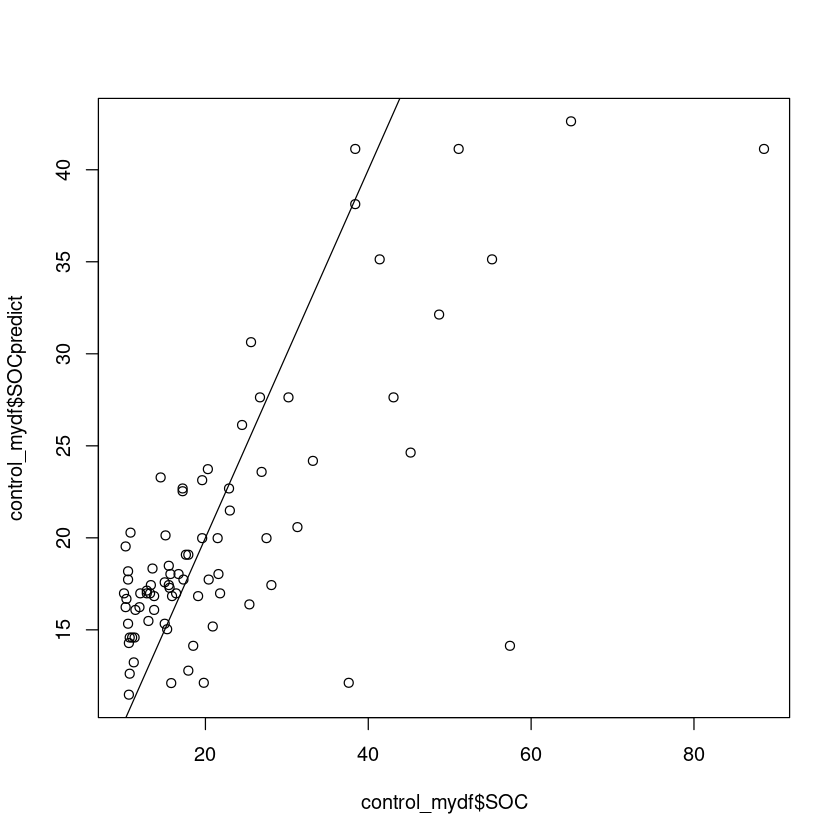

In [71]:
## Trace SOC mesuré vs SOC prédit par le modèle linéaire
plot(control_mydf$SOC, control_mydf$SOCpredict) ## scatterplot
abline(0,1) ## trace la droite 1:1

In [72]:
## Evaluataion de la qualité du modèle
cor(control_mydf$SOC,control_mydf$SOCpredict) ## coef corrélation linéaire
(cor(control_mydf$SOC,control_mydf$SOCpredict))^2 ## coef détermination
RMSE <- sqrt(sum((control_mydf$SOC-control_mydf$SOCpredict)^2)/dim(control_mydf)[1])
RMSE

[1] 0.7522284

[1] 0.5658475

[1] 10.21642

In [73]:
## Estimateur Jackknife
## charge la function myjack qui est dans le fichier funjack.R
source("/home/thierry/works/R4R2D2C/RCode/funjack.R")
## Visualisation de la function myjack
myjack

function (tmp) 
{
    cvdf <- tmp[, c("SOC", "Biomasse")]
    colnames(cvdf) <- c("SOC", "SOCpredict")
    cvdf$SOCpredict <- NA
    for (i in 1:nrow(tmp)) {
        t.cv <- tmp[-i, ]
        coeff.lm <- coefficients(lm(SOC ~ Biomasse, data = t.cv))
        cvdf[i, 2] <- coeff.lm[2] * tmp$Biomasse[i] + coeff.lm[1]
    }
    r2 <- cor(cvdf[, 1], cvdf[, 2], use = "complete.obs")^2
    rmse <- sqrt(mean((cvdf[, 1] - cvdf[, 2])^2, na.rm = T))
    bias <- mean(abs(cvdf[, 1] - cvdf[, 2]))
    resultats <- list(cvdata = cvdf, r2 = r2, RMSE = rmse, biais = bias)
    return(resultats)
}

In [74]:
## Evaluation du modèle linéaire avec la méthode jackknife
resujack <- myjack(mydf)

In [75]:
str(resujack)

List of 4
 $ cvdata:'data.frame':	269 obs. of  2 variables:
  ..$ SOC       : num [1:269] 35 24.5 23 19.8 45.2 10.3 33.2 11 10.4 37.6 ...
  ..$ SOCpredict: num [1:269] 49.2 27.2 22.1 11.7 25.5 ...
 $ r2    : num 0.496
 $ RMSE  : num 9.12
 $ biais : num 5.78


In [76]:
##############################################################
##
## IV. Modèle multi-linéaire 
## - Sélection de variables (régresseurs) via des critères d'information d'Akaike (AIC), critère d'information bayésien (BIC)
## - Contribution des variables
###############################################################
## chargement de la librairie pour la sélection
library(leaps)
## chargement de la librairie pour estimer l'importance relative des variables sélectionnées
library(relaimpo)


In [77]:
head(training_mydf) ## utilise l'ensemble des variables numériques
## la fonction 
choix_variables <- regsubsets(SOC ~ TN + C_N + PH + Clay + Shannon + Evenness + X1.Simpson + Biomasse, 
                              data = training_mydf)

,field_1,annee,SOC,TN,C_N,PH,Clay,Sand,XLB93,YLB93,cat_cultur,Categories,Shannon,Evenness,X1.Simpson,Biomasse
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,Py_1_2011,2011,35.0,3.070,11.4,6.78,44.2,4.5,857058.6,6684437,Foret,pas_de_travail,4.810,0.697131,25.743,230
9,Py_108_2011,2011,10.4,0.999,10.4,7.75,24.3,6.5,857638.5,6682798,Hiver,Travail_intermediaire,5.616,0.785689,81.258,31
11,Py_11_2011,2011,10.8,1.060,10.1,7.16,22.0,9.3,856375.5,6684113,Hiver,Labour,5.519,0.775484,68.460,28
12,Py_110_2011,2011,11.6,1.140,10.2,7.93,39.0,5.6,857423.6,6682798,Ete,Labour,5.411,0.764693,52.544,42
13,Py_111_2011,2011,14.0,1.380,10.2,8.29,40.0,9.5,857208.7,6682798,Hiver,Travail_intermediaire,5.705,0.800515,101.021,16
14,Py_112_2011,2011,38.7,3.110,12.4,7.23,44.5,7.2,856348.7,6682798,Foret,pas_de_travail,5.210,0.742701,41.946,180


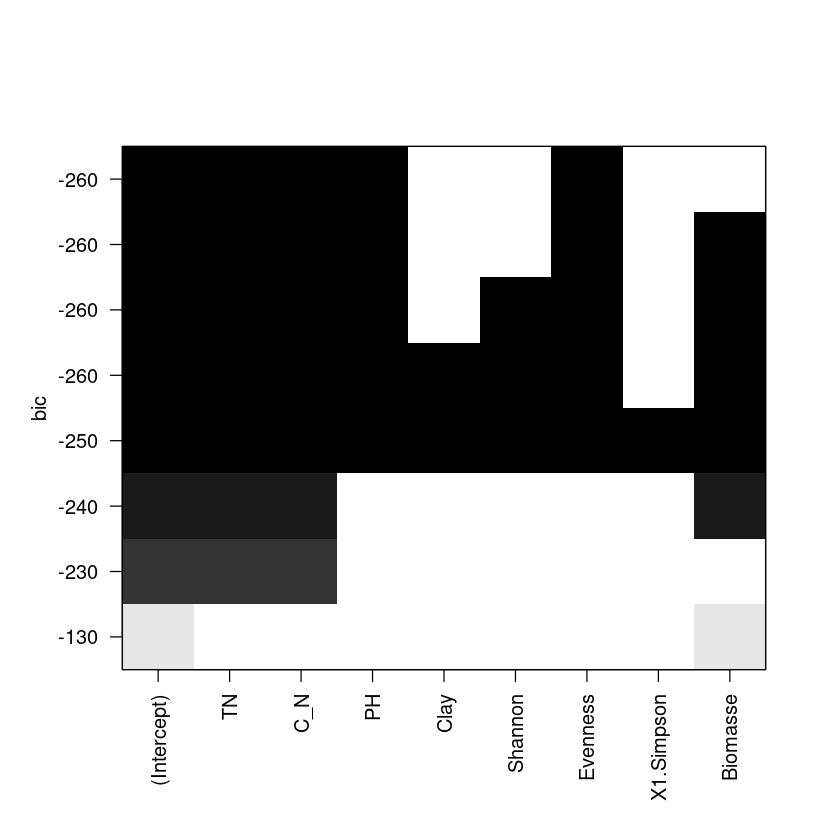

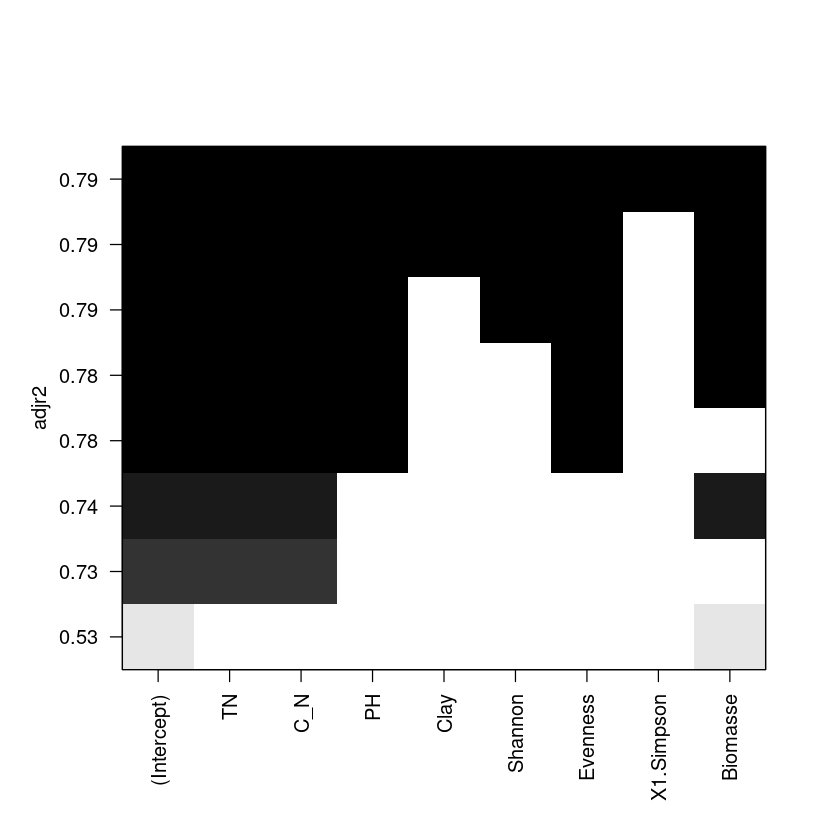

In [78]:
## trace le critère d'information ici le BIC (équivalent du AIC)
## pour ce critère on va retenir la combinaison des variables qui minimise la valeur du BIC
## pour un autre critère come le R2 ajusté on va retenir la combinaison qui maximise la valeur
plot(choix_variables, scale=c("bic"))
plot(choix_variables, scale=c("adjr2"))

#####################################################################################################################
## Question : vue les résultats avec ces deux critères quelles sont les variables et donc le modèle sélectionnée ?
#####################################################################################################################

In [79]:
## prenons par exemple le modèle SOC = fn(TN, C_N, PH, Biomasse)
mydfmlm <- lm(SOC~TN+C_N+PH+Biomasse, data = training_mydf)
summary(mydfmlm)


Call:
lm(formula = SOC ~ TN + C_N + PH + Biomasse, data = training_mydf)

Residuals:
    Min      1Q  Median      3Q     Max 
-50.018  -2.097  -0.128   1.568  23.790 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -54.54680    7.32250  -7.449 3.53e-12 ***
TN            4.79134    0.55577   8.621 3.01e-15 ***
C_N           3.49255    0.28618  12.204  < 2e-16 ***
PH            3.19538    0.76782   4.162 4.85e-05 ***
Biomasse      0.06156    0.01289   4.778 3.61e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.901 on 184 degrees of freedom
Multiple R-squared:  0.7703,	Adjusted R-squared:  0.7653 
F-statistic: 154.3 on 4 and 184 DF,  p-value: < 2.2e-16


In [80]:
## Qu'en déduisez vous quand au score du modèle multilinéaire comparativement au modèle linéaire simple ?
## Evaluer la performance du modèle en vous appuyant sur l'échantillon de contrôle
control_varselect <- control_mydf[,c("TN", "C_N", "PH", "Biomasse")]
head(control_varselect)
control_mydf$SOCpredmlm <- predict.lm(mydfmlm, control_varselect)

,TN,C_N,PH,Biomasse
,<dbl>,<dbl>,<dbl>,<dbl>
232,1.000,10.20,6.90,34
6,5.920,1.74,8.25,37
191,1.840,13.90,5.17,130
19,1.080,10.30,6.31,14
69,1.480,10.50,7.54,42
189,0.924,11.40,5.96,47


In [81]:
head(control_mydf)

,field_1,annee,SOC,TN,C_N,PH,Clay,Sand,XLB93,YLB93,cat_cultur,Categories,Shannon,Evenness,X1.Simpson,Biomasse,SOCpredict,SOCpredmlm
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
232,Py_64_2011,2011,10.2,1.000,10.20,6.90,29.8,7.4,858282.7,6682367,Hiver,Labour,5.548,0.776101,64.648,34,16.23237,10.009851
6,Py_104_2011,2011,10.3,5.920,1.74,8.25,31.0,5.6,858068.2,6682798,Hiver,Travail_intermediaire,5.519,0.771110,73.336,37,16.68237,8.534674
191,Py_284_2011,2011,25.6,1.840,13.90,5.17,23.5,7.6,853982.2,6683012,Foret,pas_de_travail,4.788,0.691480,21.834,130,30.63216,27.339152
19,Py_117_2011,2011,11.2,1.080,10.30,6.31,30.6,8.1,854197.4,6683012,Brassicacees,Travail_intermediaire,5.656,0.796540,97.848,14,13.23242,7.625865
69,Py_164_2011,2011,15.5,1.480,10.50,7.54,36.0,7.6,855488.6,6683443,Hiver,Labour,5.539,0.785992,78.993,42,17.43236,15.895011
189,Py_281_2011,2011,10.5,0.924,11.40,5.96,12.5,7.4,856994.5,6683444,Foret,pas_de_travail,5.365,0.753554,48.157,47,18.18234,11.633451


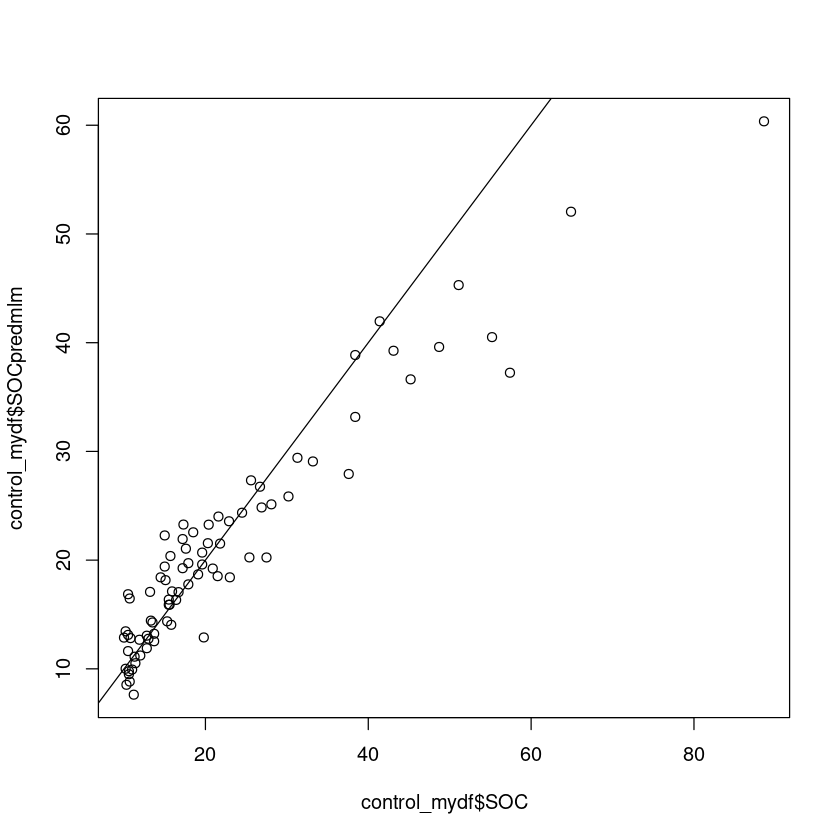

In [82]:
## Trace SOC mesuré vs SOC prédit par le modèle multi-linéaire
plot(control_mydf$SOC, control_mydf$SOCpredmlm) ## scatterplot
abline(0,1) ## trace la droite 1:1

In [83]:
## Evaluataion de la qualité du modèle multi-linéaire
cor(control_mydf$SOC,control_mydf$SOCpredmlm) ## coef corrélation linéaire
(cor(control_mydf$SOC,control_mydf$SOCpredmlm))^2 ## coef détermination
RMSE <- sqrt(sum((control_mydf$SOC-control_mydf$SOCpredmlm)^2)/dim(control_mydf)[1])
RMSE

[1] 0.952271

[1] 0.90682

[1] 5.603865

In [84]:
###############################################
##
## Contribution des variables
## utilisation de la fonction calc.relimp du package relaimpo
###############################################
reg.mlm <- lm(SOC ~ TN + C_N + PH + Biomasse, data = mydf)
regrelimpo <- calc.relimp(reg.mlm, type = c("lmg","pratt", "genizi","car"),
                          rela = TRUE, rank = TRUE)
summary(reg.mlm)


Call:
lm(formula = SOC ~ TN + C_N + PH + Biomasse, data = mydf)

Residuals:
    Min      1Q  Median      3Q     Max 
-62.831  -1.535   0.037   1.355  20.171 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -53.43642    5.28792 -10.105  < 2e-16 ***
TN            6.58933    0.41802  15.763  < 2e-16 ***
C_N           3.75157    0.23589  15.904  < 2e-16 ***
PH            2.46561    0.52440   4.702 4.16e-06 ***
Biomasse      0.03705    0.01001   3.700 0.000262 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.581 on 264 degrees of freedom
Multiple R-squared:  0.8144,	Adjusted R-squared:  0.8116 
F-statistic: 289.6 on 4 and 264 DF,  p-value: < 2.2e-16


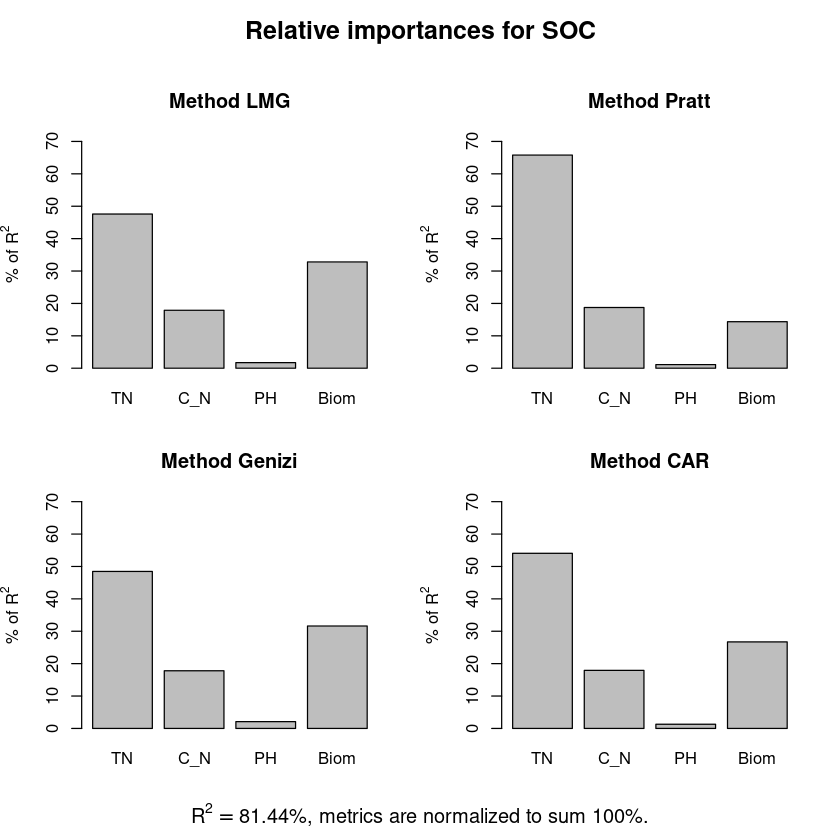

In [85]:
plot(regrelimpo)

In [86]:
#############################################
## Que dire de ces résultats ?
############################################

## Calcul du SOC prédit par le modèle
mydata$SOCpredmlm <- predict.lm(reg.mlm, mydf[,c("TN", "C_N", "PH", "Biomasse")])


In [87]:
class(mydata)
getwd()

[1] "sf"         "data.frame"

[1] "/home/thierry/works/R4R2D2C/BData"

In [88]:
## exporte mydata qui est un objet sf dans R en un fichier SIG shapefile lisible par QGIS
st_write(mydata, "newptsampleFenayL93.shp", delete_layer = TRUE)

Deleting layer `newptsampleFenayL93' using driver `ESRI Shapefile'
Writing layer `newptsampleFenayL93' to data source 
  `newptsampleFenayL93.shp' using driver `ESRI Shapefile'
Writing 269 features with 17 fields and geometry type Point.


In [89]:
## Allez ouvrir cette nouvelle couche/carte avec QGIS
## Faire la carte des différences entre SOC mesuré et SOC prédit par le modèle multi-linéaire